In [1]:
import pandas as pd
import numpy as np

In [2]:
questions = pd.read_csv('data/train_questions.csv')
answers = pd.read_csv('data/train_answers.csv')

In [3]:
questions.head()

,question_id,question,course,year,candidate_answers,answer_id
0,79062,"For categorical target set, where the distribu...",Machine Learning Zoomcamp,2021,"156400,754877,105368,643810,912439",156400
1,468946,Is there anything that we are not allowed to u...,Machine Learning Zoomcamp,2021,"641330,634887,912439,425941,642829",634887
2,968800,I have been catching up and have been doing ho...,Data Engineering Zoomcamp,2022,"954016,167856,75919,36798,838013",954016
3,688404,Could you please explain what code we should l...,Data Engineering Zoomcamp,2022,"198661,629898,686577,3699,141765",3699
4,63921,Is it just me or does the model have really ba...,Machine Learning Zoomcamp,2021,"754877,604487,912439,858915,425941",858915


In [4]:
answers.head()

,answer_id,answer,course,year,attachments_files
0,156400,Alexey\nShould we use something non-standard t...,Machine Learning Zoomcamp,2021,NaN
1,634887,"No, I don't think there is anything you cannot...",Machine Learning Zoomcamp,2021,NaN
2,954016,"Alexey\nYes, you will be. You can submit the p...",Data Engineering Zoomcamp,2022,NaN
3,3699,Alexey\nI think the question refers to the hom...,Data Engineering Zoomcamp,2022,NaN
4,858915,"Dmitry\nIt's fine, because this is the showcas...",Machine Learning Zoomcamp,2021,NaN


In [5]:
qa = pd.merge(left=questions, right=answers, on='answer_id')

In [6]:
qa.head()

,question_id,question,course_x,year_x,candidate_answers,answer_id,answer,course_y,year_y,attachments_files
0,79062,"For categorical target set, where the distribu...",Machine Learning Zoomcamp,2021,"156400,754877,105368,643810,912439",156400,Alexey\nShould we use something non-standard t...,Machine Learning Zoomcamp,2021,NaN
1,468946,Is there anything that we are not allowed to u...,Machine Learning Zoomcamp,2021,"641330,634887,912439,425941,642829",634887,"No, I don't think there is anything you cannot...",Machine Learning Zoomcamp,2021,NaN
2,968800,I have been catching up and have been doing ho...,Data Engineering Zoomcamp,2022,"954016,167856,75919,36798,838013",954016,"Alexey\nYes, you will be. You can submit the p...",Data Engineering Zoomcamp,2022,NaN
3,688404,Could you please explain what code we should l...,Data Engineering Zoomcamp,2022,"198661,629898,686577,3699,141765",3699,Alexey\nI think the question refers to the hom...,Data Engineering Zoomcamp,2022,NaN
4,63921,Is it just me or does the model have really ba...,Machine Learning Zoomcamp,2021,"754877,604487,912439,858915,425941",858915,"Dmitry\nIt's fine, because this is the showcas...",Machine Learning Zoomcamp,2021,NaN


In [7]:
qa.rename(columns={'course_x': 'q_course', 'year_x': 'q_year', 'course_y': 'a_course', 'year_y':'a_year'}, inplace=True)
qa.head()

,question_id,question,q_course,q_year,candidate_answers,answer_id,answer,a_course,a_year,attachments_files
0,79062,"For categorical target set, where the distribu...",Machine Learning Zoomcamp,2021,"156400,754877,105368,643810,912439",156400,Alexey\nShould we use something non-standard t...,Machine Learning Zoomcamp,2021,NaN
1,468946,Is there anything that we are not allowed to u...,Machine Learning Zoomcamp,2021,"641330,634887,912439,425941,642829",634887,"No, I don't think there is anything you cannot...",Machine Learning Zoomcamp,2021,NaN
2,968800,I have been catching up and have been doing ho...,Data Engineering Zoomcamp,2022,"954016,167856,75919,36798,838013",954016,"Alexey\nYes, you will be. You can submit the p...",Data Engineering Zoomcamp,2022,NaN
3,688404,Could you please explain what code we should l...,Data Engineering Zoomcamp,2022,"198661,629898,686577,3699,141765",3699,Alexey\nI think the question refers to the hom...,Data Engineering Zoomcamp,2022,NaN
4,63921,Is it just me or does the model have really ba...,Machine Learning Zoomcamp,2021,"754877,604487,912439,858915,425941",858915,"Dmitry\nIt's fine, because this is the showcas...",Machine Learning Zoomcamp,2021,NaN


In [8]:
qa[qa['q_course'] != qa['a_course']]

,question_id,question,q_course,q_year,candidate_answers,answer_id,answer,a_course,a_year,attachments_files


In [9]:
qa[qa['q_year'] != qa['a_year']]

,question_id,question,q_course,q_year,candidate_answers,answer_id,answer,a_course,a_year,attachments_files


In [10]:
len(qa[qa['attachments_files'].notna()])

25

In [11]:
questions.iloc[395]['course']

'Machine Learning Zoomcamp'

In [12]:
questions['year'].value_counts()

year
2021    199
2022    198
Name: count, dtype: int64

In [13]:
questions['course'].value_counts()

course
Machine Learning Zoomcamp    199
Data Engineering Zoomcamp    198
Name: count, dtype: int64

In [24]:
# !pip install wordcloud matplotlib

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [22]:
question_text = "\n".join(questions['question'].tolist())
answer_text = "\n".join(answers['answer'].tolist())

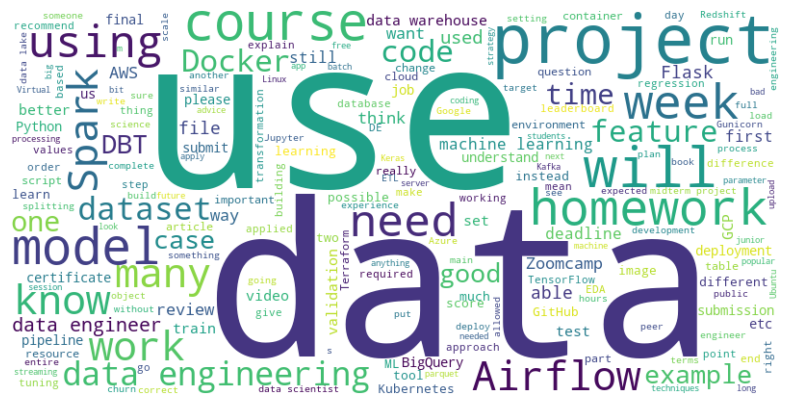

In [21]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


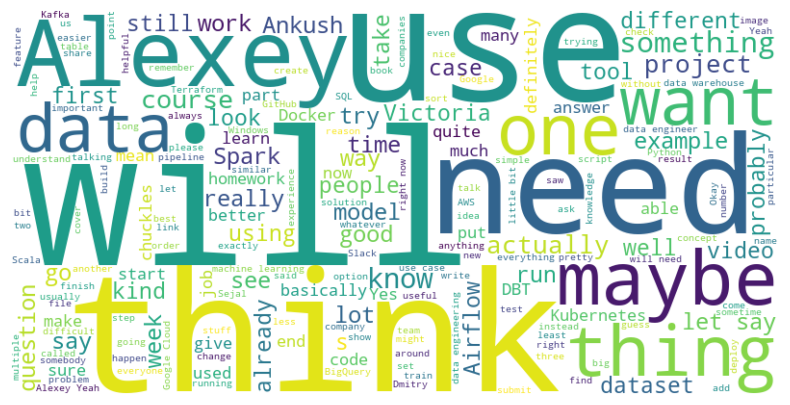

In [23]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(answer_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

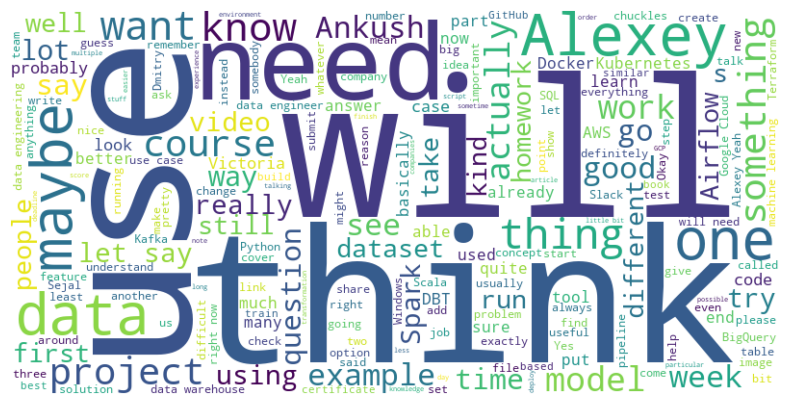

In [26]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_text+answer_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()